# Projeto Programming - Regressão Linear

Regressão Linear Simples : f_wb = w * x + b

Regressão Linear Múltipla: f_wb = $\overrightarrow{w}$ . $\overrightarrow{x}$ + b

## Criação do dataset

In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
def generate_dataset(n_points, dimensions = 2, mean = 5, std_dev = 0.25):
    """Vai dar retorno a um dataset de vertical stack vetores com (n_points) data points 
    e (dimensions) colunas"""

    points = np.random.normal(loc= mean, scale= std_dev, size= (n_points, dimensions))        

    return np.vstack(points)

In [37]:
# Exemplo de criação de um dataset com 150 pontos e 2 colunas (1 coluna para a feature e outra para a label)

dataset = generate_dataset(150, dimensions = 2)

dataset

array([[5.08213873, 5.03327354],
       [4.60507938, 5.10840332],
       [4.83298722, 4.70525622],
       [5.0802918 , 4.86161851],
       [4.84794544, 4.71329323],
       [5.16240463, 4.95766543],
       [4.70243721, 4.85885452],
       [4.97511217, 4.61851421],
       [4.55062928, 5.17293689],
       [5.22432941, 5.0800569 ],
       [5.37562007, 4.60624288],
       [5.03524948, 4.90448502],
       [5.21570925, 5.63679166],
       [4.81770999, 4.93092431],
       [4.72710425, 4.88343517],
       [5.42069161, 5.14675346],
       [4.86699594, 5.04088956],
       [4.46404163, 4.80582113],
       [4.89334741, 5.00794626],
       [5.21854572, 4.91436006],
       [5.22066418, 5.13841486],
       [4.85683339, 4.78597656],
       [5.12170036, 4.87175804],
       [4.9024402 , 5.31834808],
       [5.08703679, 5.11281722],
       [4.79596108, 4.93827975],
       [4.93744226, 5.17393184],
       [4.68241584, 4.98325823],
       [5.41514223, 4.97679382],
       [5.34526878, 5.21716585],
       [4.

## Iniciação da Regressão

In [38]:
def initial_lin_reg(x, y):

    b = np.random.uniform(1, 3)

    if x.ndim == 1:                                         # Se definirmos apenas 1 feature

        w = np.random.uniform(0, 1)                         # Gerar coeficiente de w de 0 ou 1

        y_hats = w * x + b                                  # Fazer previsões de y dado o w e b definidos acima

        plt.scatter(x, y)
        plt.plot(x, y_hats, color = 'red', label='Regressão Inicial')
        print(f'A representação inicial de y_hat = {w} x + {b}')

    else:                                                   # Se definirmos mais do que 1 feature no modelo

        w = np.random.randint(0,1,x.shape[1])               # Gerar coeficientes de w de 0 a 1 para cada feature

        y_hats = np.dot(x, w) + b

        formula_regressao = " + ".join([f"{w[i]}*x{i+1}" for i in range(len(w))]) if len(w) > 1 else f"{w[0]}x + {b}"
        print(f'A representação inicial de y_hat = {formula_regressao} + {b}')

    return w, b

A representação inicial de y_hat = 0.9197199779385913 x + 1.5424808769740044


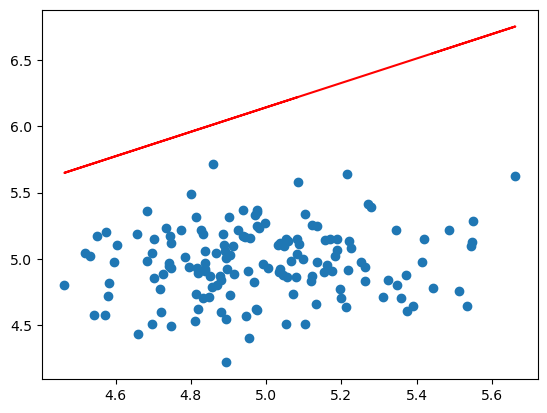

In [39]:
# Exemplo para testar a função initial_lin_reg


# x, y, w, b = initial_lin_reg(dataset[:, :-1], dataset[:, -1])           # Caso tenhamos + do que 1 feature

w, b = initial_lin_reg(dataset[:,0], dataset[:,1])                # Caso tenhamos apenas 1 feature

## Definição da função de custo - Mean Squared Error Function

In [40]:
def cost_function(x, y, w, b):

    m = len(x)                                              # Número de data points

    if x.ndim == 1:
        
        y_hats = w * x + b                                  # Previsões de y caso a regressão seja simples
    
    else:

        y_hats = np.dot(x, w) + b                           # Previsões de y caso a regressão seja múltipla    

    cost = (1/(2*m)) * np.sum((y_hats - y) ** 2)            # Função custo

    return y_hats, cost

In [41]:
y_hats, cost = cost_function(dataset[:,0], dataset[:,1], w, b)
y_hats, cost

(array([6.2166254 , 5.77786438, 5.98747578, 6.21492674, 6.00123315,
        6.29044755, 5.86740632, 6.11819093, 5.72778554, 6.347401  ,
        6.48654605, 6.17350042, 6.33947288, 5.973425  , 5.8900931 ,
        6.52799925, 6.01875428, 5.64814915, 6.04299025, 6.34208163,
        6.34403002, 6.00940758, 6.25301102, 6.05135307, 6.22113024,
        5.9534221 , 6.08354516, 5.84899227, 6.52289537, 6.45863136,
        6.11965044, 6.32508934, 6.21928576, 5.7465636 , 6.38341517,
        6.26580242, 5.90955669, 6.11606224, 6.06319681, 6.18308907,
        6.19432992, 6.46076816, 5.75102439, 6.64082571, 6.13776535,
        6.20560439, 5.99242221, 5.90591192, 5.86147283, 6.09632105,
        5.97090034, 5.94209437, 6.32193658, 5.99196722, 6.61277   ,
        6.23596364, 5.95689124, 6.09978349, 6.47030762, 6.12487752,
        6.28251226, 5.71944327, 6.02886782, 6.17586807, 6.64450305,
        6.03463219, 6.26191226, 6.11979273, 6.33678857, 5.99246133,
        6.11123413, 6.02997431, 5.86694938, 5.98

# Regressão Linear

In [42]:
def linear_regression(x, y, learning_rate = 0.01, n_iterations = 100000, min_error = 1e-6, min_update = 1e-6):
    """ Esta função recria o processo de regressão linear simples/múltipla. Inicia parâmetros aleatórios de w e b, ficando
    assim com uma linha de referência. Depois, através do conceito de cost function e gradiente descendente, o algoritmo vai atualizar
    os parâmetros de w e b de forma a otimizar o modelo de regressão, até ao ponto em que w e b convergem (ou até à condição de paragem 
    definida pelo utilizador ser atingida: número de passos, erro mínimo ou alterações entre iterações mínima);
    
    É devolvido o valor final de w, o valor final de b, e o histórico da função custo;

    x = features/input
    y = label/ouput
    learning_rate = tamanho da atualização dos parâmetros no processo de gradiente descendente
    n_iterations = número máximo de atualizações de w e b
    min_error = threshold de cost function para o algoritmo parar
    min_update = threshold de atualizações em w e b para o algoritmo parar
    
    """

    w, b = initial_lin_reg(x, y)
    cost_history = []
    m = len(x)

    for i in range(n_iterations):

        y_hats, cost = cost_function(x, y, w, b)

        if x.ndim == 1:
            dcdw = (1/m) * np.sum((y_hats - y) * x)         # Derivada da cost function em relação a w
        else: 
            dcdw = (1/m) * np.dot(x.T, (y_hats - y))        # Derivada da cost function em relação a w quando temos mais do que 1 variável indep.
            
        dcdb = (1/m) * np.sum(y_hats - y)                   # Derivada da cost function em relação a b

        w_new = w - learning_rate * dcdw                    # Atualização de w
        b_new = b - learning_rate * dcdb                    # Atualização de b

        current_cost = cost_function(x, y, w_new, b_new)[1]

        cost_history.append(current_cost)

        if (np.array_equal(w_new, w) if not np.isscalar(w) else w_new == w) and b_new == b:                                 # Se não houver mais atualizações dos parâmetros
                print(f'Paragem na iteração {i + 1} porque a os valores de w e b convergiram de acordo com o gradiente.')
                break

        if current_cost < min_error:
                print(f'Paragem na iteração {i + 1} porque a função custo atual ({current_cost}) já não é superior a {min_error}.')
                break

        if np.all(np.abs(w_new - w) < min_update) and np.abs(b_new - b) < min_update:
                print(f'Paragem na iteração {i + 1} porque as alterações em w e b já não são maiores do que {min_update}.')
                break
        
        w, b = w_new, b_new
        
    else:
        print(f'Paragem porque atingiu o número máximo de iterações: {i + 1}')

    
    if x.ndim == 1:
        print(f'O ótimo da regressão está definido em y_hat = {w} x + {b}')
        plt.scatter(x, y)
        plt.plot(x, w* x + b, color = 'green', label='Regressão Final', linewidth=2)
        plt.legend()
        plt.title('Representação do dataset e regressões lineares')

    else:
        formula_regressao = " + ".join([f"{w[i]}*x{i+1}" for i in range(len(w))]) if len(w) > 1 else f"{w[0]}x + {b}"
        print(f'O ótimo da regressão está definido em y_hat = {formula_regressao} + {b}')
    
    return w, b, cost_history

A representação inicial de y_hat = 0.5575972353898118 x + 1.5495361724202878
Paragem porque atingiu o número máximo de iterações: 50000
O ótimo da regressão está definido em y_hat = 0.2847504909762831 x + 3.5518197178100492


(0.2847504909762831,
 3.5518197178100492,
 [0.1562618444132966,
  0.10590550686633923,
  0.07827405788732975,
  0.06311207597846281,
  0.05479226663534629,
  0.05022685394882424,
  0.04772153170163307,
  0.04634661016164335,
  0.04559195545268759,
  0.04517764991770214,
  0.04495009878794751,
  0.04482502244622592,
  0.04475617547719343,
  0.04471818236881673,
  0.044697119219533475,
  0.04468534578805631,
  0.04467866976616829,
  0.04467479077518677,
  0.04467244656486423,
  0.04467094452067601,
  0.04466990459525748,
  0.04466911825125579,
  0.044668471061281946,
  0.044667900237412364,
  0.044667371327026674,
  0.04466686542548545,
  0.04466637215954573,
  0.0446658858372622,
  0.04466540333538369,
  0.044664922940137686,
  0.0446644437111525,
  0.044663965132432495,
  0.04466348692084302,
  0.044663008921023616,
  0.04466253104772535,
  0.0446620532541704,
  0.04466157551469063,
  0.04466109781520109,
  0.04466062014797265,
  0.04466014250876376,
  0.044659664895246504,
  0.0446591

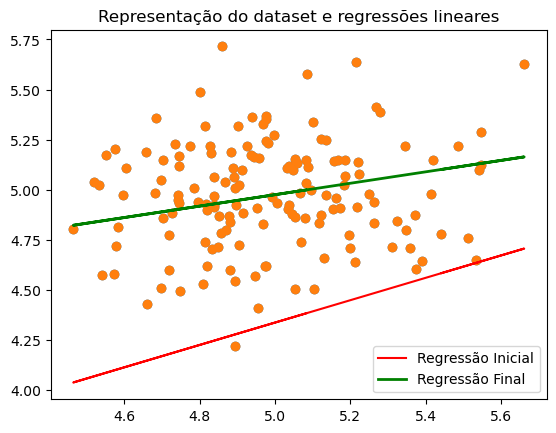

In [43]:
linear_regression(dataset[:,0], dataset[:,1], learning_rate = 0.01, n_iterations=50000)

## Aplicação prática da regressão

In [44]:
horas_estudo = np.array([8,0.5,2,3.4,9,13,10,3.7,8,7.7,14,11,4.8,3.7,12,1.75,6,9,8,15,5,6,7,8,9,10,11,12,13,14,15,0.75,1.75,2.4,3.9,5.84,6.95,5,8.75,9,11.5,13,16,12.85,13,14,10.5,13,12.75,10])

nota_exame = np.array([14,5,8,7.5,12,16,14,10,11,13,18,16,7.5,9,19,4.75,3.5,14,12.5,12,6,4.75,12,14,10,16.5,18,17,15.5,16,18,4.5,7,5,8,3.75,9,11,9.5,7.6,14.5,16,18.5,17.75,14.5,19,17,15.5,16,13])

In [45]:
horas_estudo.shape, nota_exame.shape

((50,), (50,))

A representação inicial de y_hat = 0.5831309262733618 x + 2.6299865928606576
Paragem na iteração 11376 porque as alterações em w e b já não são maiores do que 1e-12.
O ótimo da regressão está definido em y_hat = 0.9448042025018237 x + 3.8785286931498364


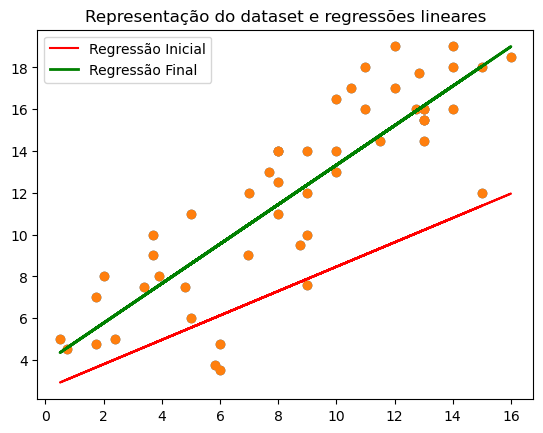

In [46]:
w, b, cost_history = linear_regression(horas_estudo,nota_exame, learning_rate = 0.01, n_iterations = 20000, min_error = 1e-12, min_update = 1e-12)

In [47]:
def predict_y(X, w, b):
    if isinstance(X, (int, float)):                             # Verifica se X é apenas 1 feature 
        result = w * X + b
    else:                                                       # Caso X seja uma lista (assim como w)
        result = sum(x * wi for x, wi in zip(X, w)) + b

    return round(result,2)

In [48]:
resultado = predict_y(14,w,b)
resultado

17.11